## 一、特征提取及拼写错误修改

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

########## 1、获取数字化后的图像训练数据 ##########
f = open("faceR","r",encoding="utf8")
x = f.read()
f.close()
x = x.split() #默认删除所有空字符，包括空格和换行符等
x = np.array(list(float(char) for char in x)) #字符串列表转数组
x.resize((1996,100)) #转为二维数组
xtrain = x
print('图像训练数据xtrain:\n',xtrain,xtrain.shape)
xtrain = np.delete(xtrain,0,axis=1) #删除第一列：图片编号
print('\nxtrain去编号后：\n',xtrain,xtrain.shape)
#标准化图像训练数据
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
n_features = xtrain.shape[1]
n_samples = xtrain.shape[0]
print('\nxtrain标准化后：\n',xtrain,"\n特征数：",n_features,"\n样本数：",n_samples)


######### 2、获取预处理后的标签训练数据 ##########
f = open("faceDR","r",encoding="utf8")
y = f.read()
f.close()
y = y.split() #默认删除所有空字符，包括空格和换行符等
#print(y)
del y[0]
#print(y)
y = np.array(y)
y.resize((1996,5))
ytrain = y
#faceDR中错误修改
for i in range(1996):
    if ytrain[i,2] == 'chil':
        ytrain[i,2] = 'child'
    elif ytrain[i,2] == 'adulte':
        ytrain[i,2] = 'adult'
    elif ytrain[i,3] == 'whit':
        ytrain[i,3] = 'white'
    elif ytrain[i,3] == 'whitee':
        ytrain[i,3] = 'white'
    elif ytrain[i,4] == 'erious':
        ytrain[i,4] = 'serious'
    elif ytrain[i,4] == 'smilin':
        ytrain[i,4] = 'smiling'
print('标签训练数据ytrain:\n',ytrain,ytrain.shape)

#性别分类
print('\n性别分类ytrain_sex:\n',ytrain[:,1],ytrain[:,1].shape)
#年龄分类
print('\n年龄分类ytrain_age:\n',ytrain[:,2],ytrain[:,2].shape)
#种族分类
print('\n种族分类ytrain_race:\n',ytrain[:,3],ytrain[:,3].shape)
#表情分类
print('\n表情分类ytrain_face:\n',ytrain[:,4],ytrain[:,4].shape)


########### 3、获取预处理后的测试数据 #########
f = open("faceS","r",encoding="utf8")
x2 = f.read()
f.close()
x2 = x2.split() #默认删除所有空字符，包括空格和换行符等
x2 = np.array(list(float(char) for char in x2)) #字符串列表转数组
x2.resize((1996,100)) #转为二维数组
xtest = x2
print('图像测试数据xtest:\n',xtest,xtest.shape)
xtest = np.delete(xtest,0,axis=1) #删除第一列：图片编号
print('\nxtest去编号后：\n',xtest,xtest.shape)
xtest = scaler.fit_transform(xtest)
print('\nxtest标准化后：\n',xtest)


########### 4、获取标签测试数据 ##########
f = open("faceDS","r",encoding="utf8")
y2 = f.read()
f.close()
y2 = y2.split() #默认删除所有空字符，包括空格和换行符等
#del y2[0]  #faceDS文件比faceDR文件少了第一个多余的字符串，所以不用del掉。建议此处先print测试一下
y2 = np.array(y2)
y2.resize((1996,5))
ytest = y2
print('标签测试数据ytest:\n',ytest,ytest.shape)
#性别分类
print('\n性别分类ytest_sex:\n',ytest[:,1],ytest[:,1].shape)
#年龄分类
print('\n年龄分类ytest_age:\n',ytest[:,2],ytest[:,2].shape)
#种族分类
print('\n种族分类ytest_race:\n',ytest[:,3],ytest[:,3].shape)
#表情分类
print('\n表情分类ytest_face:\n',ytest[:,4],ytest[:,4].shape)


########## 5、创建LDA模型降维并训练 ###########
##不同于PCA用于无监督学习的特征提取，FLDA适用于监督学习的特征提取，即需要标签y一起送入LDA模型中训练
#创建性别分类的LDA模型降维并训练
lda_sex = LDA(n_components=1) #监督学习下的FLDA特征提取，数据降维后的维数受特征维数和类别数的限制，不能超过（类别数-1）；PCA较自由
lda_sex.fit(xtrain,ytrain[:,1]) #最大不能超过2-1=1
#将训练好的LDA模型对数据进行特征提取
xtrain_sex = lda_sex.transform(xtrain)
xtest_sex = lda_sex.transform(xtest)
print('用训练后的性别分类LDA模型降维后的图像训练数据和测试数据：',xtrain_sex.shape,xtest_sex.shape)

#创建年龄分类的LDA模型降维并训练
lda_age = LDA(n_components=3) #最大不能超过4-1=3
lda_age.fit(xtrain,ytrain[:,2])
#将训练好的LDA模型对数据进行特征提取
xtrain_age = lda_age.transform(xtrain)
xtest_age = lda_age.transform(xtest)
print('用训练后的年龄分类LDA模型降维后的图像训练数据和测试数据：',xtrain_age.shape,xtest_age.shape)

#创建种族分类的LDA模型降维并训练
lda_race = LDA(n_components=4) #最大不能超过5-1=4
lda_race.fit(xtrain,ytrain[:,3])
#将训练好的LDA模型对数据进行特征提取
xtrain_race = lda_race.transform(xtrain)
xtest_race = lda_race.transform(xtest)
print('用训练后的种族分类LDA模型降维后的图像训练数据和测试数据：',xtrain_race.shape,xtest_race.shape)

#创建表情分类的LDA模型降维并训练
lda_face = LDA(n_components=2) #最大不能超过3-1=2
lda_face.fit(xtrain,ytrain[:,4])
#将训练好的LDA模型对数据进行特征提取
xtrain_face = lda_face.transform(xtrain)
xtest_face = lda_face.transform(xtest)
print('用训练后的表情分类LDA模型降维后的图像训练数据和测试数据：',xtrain_face.shape,xtest_face.shape)

图像训练数据xtrain:
 [[ 1.22300000e+03 -1.77961902e+03  2.10730127e+03 ... -8.61942370e+01
   1.28772320e+01  2.38823390e+01]
 [ 1.22400000e+03 -2.71997339e+03  2.97884375e+03 ... -4.68737700e+00
  -4.28034670e+01  1.19861970e+01]
 [ 1.22500000e+03 -9.46141785e+02 -1.17116028e+03 ...  6.00232730e+01
   2.21902800e+00  1.66275270e+01]
 ...
 [ 3.22000000e+03  1.07736768e+03 -6.24962646e+02 ...  3.08739870e+01
  -1.76446100e+00  6.32692180e+01]
 [ 3.22100000e+03  1.62751266e+02  1.92902429e+03 ...  1.28961792e+02
   5.91272430e+01 -5.73871399e+02]
 [ 3.22200000e+03 -6.97708984e+02 -2.36467910e+01 ... -9.68876270e+01
  -1.05578690e+02  1.03433350e+02]] (1996, 100)

xtrain去编号后：
 [[-1.77961902e+03  2.10730127e+03  8.07759949e+02 ... -8.61942370e+01
   1.28772320e+01  2.38823390e+01]
 [-2.71997339e+03  2.97884375e+03 -1.22765790e+01 ... -4.68737700e+00
  -4.28034670e+01  1.19861970e+01]
 [-9.46141785e+02 -1.17116028e+03  5.57305603e+02 ...  6.00232730e+01
   2.21902800e+00  1.66275270e+01]
 ...
 [ 

## 二、SVM分类器及其交叉验证

1. 性别分类

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
#标签数据预处理  
le = LabelEncoder()  
ytrain_sex = le.fit_transform(ytrain[:,1]) 
ytest_sex = le.transform(ytest[:,1])

#用GridSearch调参
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4,0.1, 1, 10],
                     'C': [0.1,1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000]}]
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [15]:
##性别分类
grid_search.fit(xtrain_sex, ytrain_sex)
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
准确率:  0.8222205513784461


In [7]:
svm_sex = SVC(kernel='rbf',C=10,gamma=0.001) #创建最优参数的分类器并训练
svm_sex.fit(xtrain_sex, ytrain_sex)
predict_sex = np.array(le.inverse_transform(svm_sex.predict(xtest_sex))) #预测
print('SVM分类——性别分类预测结果：',predict_sex,predict_sex.shape)
print('SVM分类——性别分类分数：',svm_sex.score(xtest_sex,ytest_sex))

SVM分类——性别分类预测结果： ['female' 'female' 'male' ... 'female' 'male' 'female'] (1996,)
SVM分类——性别分类分数： 0.7064128256513026


2. 年龄分类

In [8]:
#标签数据预处理   
ytrain_age = le.fit_transform(ytrain[:,2]) 
ytest_age = le.transform(ytest[:,2])

In [17]:
##年龄分类
grid_search.fit(xtrain_age, ytrain_age)
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
准确率:  0.8212606516290727


In [9]:
svm_age = SVC(kernel='rbf',C=10,gamma=0.1) #创建最优参数的分类器并训练
svm_age.fit(xtrain_age, ytrain_age)
predict_age = np.array(le.inverse_transform(svm_age.predict(xtest_age))) #预测
print('SVM分类——年龄分类预测结果：',predict_age,predict_age.shape)
print('SVM分类——年龄分类分数：',svm_age.score(xtest_age,ytest_age))

SVM分类——年龄分类预测结果： ['adult' 'adult' 'adult' ... 'adult' 'adult' 'child'] (1996,)
SVM分类——年龄分类分数： 0.8286573146292585


3. 种族分类

In [10]:
#标签数据预处理   
ytrain_race = le.fit_transform(ytrain[:,3]) 
ytest_race = le.transform(ytest[:,3])

In [19]:
##年龄分类
grid_search.fit(xtrain_race, ytrain_race)
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
准确率:  0.9549160401002507


惩罚系数太大，重新调整一下

In [11]:
svm_race = SVC(kernel='rbf',C=1,gamma=0.1) #创建最优参数的分类器并训练
svm_race.fit(xtrain_race, ytrain_race)
predict_race = np.array(le.inverse_transform(svm_race.predict(xtest_race))) #预测
print('SVM分类——种族分类预测结果：',predict_race,predict_race.shape)
print('SVM分类——种族分类分数：',svm_race.score(xtest_race,ytest_race))

SVM分类——种族分类预测结果： ['white' 'white' 'white' ... 'white' 'white' 'white'] (1996,)
SVM分类——种族分类分数： 0.8617234468937875


4. 表情分类

In [12]:
#标签数据预处理   
ytrain_face = le.fit_transform(ytrain[:,4]) 
ytest_face = le.transform(ytest[:,4])

In [37]:
##年龄分类
grid_search.fit(xtrain_face, ytrain_face)
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'C': 1, 'kernel': 'linear'}
准确率:  0.7990902255639097


In [13]:
svm_face = SVC(kernel='linear',C=1) #创建最优参数的分类器并训练
svm_face.fit(xtrain_face, ytrain_face)
predict_face = np.array(le.inverse_transform(svm_face.predict(xtest_face))) #预测
print('SVM分类——表情分类预测结果：',predict_face,predict_face.shape)
print('SVM分类——表情分类分数：',svm_face.score(xtest_face,ytest_face))

SVM分类——表情分类预测结果： ['smiling' 'smiling' 'smiling' ... 'serious' 'smiling' 'serious'] (1996,)
SVM分类——表情分类分数： 0.7695390781563126


5. 五折交叉验证

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [15]:
#合并x数据和y数据
X = np.concatenate([xtrain,xtest],axis=0)
Y = np.concatenate([ytrain,ytest],axis=0)
print('所有图像数据：\n',X,X.shape,'\n所有标签数据：\n',Y,Y.shape)
#交叉验证
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

Y_sex = le.fit_transform(Y[:,1])
sex_result = cross_val_score(svm_sex,X,Y_sex,cv=kfold)
print('性别SVM分类交叉验证结果：%0.2f(±%0.2f)'%(sex_result.mean(),sex_result.std()*2))

Y_age = le.fit_transform(Y[:,2])
age_result = cross_val_score(svm_age,X,Y_age,cv=kfold)
print('年龄SVM分类交叉验证结果：%0.2f(±%0.2f)'%(age_result.mean(),age_result.std()*2))

Y_race = le.fit_transform(Y[:,3])
race_result = cross_val_score(svm_race,X,Y_race,cv=kfold)
print('种族SVM分类交叉验证结果：%0.2f(±%0.2f)'%(race_result.mean(),race_result.std()*2))

Y_face = le.fit_transform(Y[:,4])
face_result = cross_val_score(svm_face,X,Y_face,cv=kfold)
print('表情SVM分类交叉验证结果：%0.2f(±%0.2f)'%(face_result.mean(),face_result.std()*2))

所有图像数据：
 [[-0.7150059   1.44885637  0.76471857 ... -0.73084344  0.03944986
   0.13721498]
 [-1.15504469  2.06241286 -0.08316677 ...  0.1045747  -0.53830313
   0.03210577]
 [-0.32498026 -0.85914513  0.50575868 ...  0.76783728 -0.07114159
   0.07311457]
 ...
 [ 0.26054715 -0.31819057  0.46323974 ... -0.22319601  0.58655735
   0.95461083]
 [ 1.20349938 -1.27928629 -0.19565995 ...  0.66274007 -0.95181123
   0.24443456]
 [-0.25280096 -0.35152049  0.50628644 ...  0.29991465  0.04875693
  -1.26361894]] (3992, 99) 
所有标签数据：
 [['1223' 'male' 'child' 'white' 'smiling']
 ['1224' 'male' 'child' 'white' 'serious']
 ['1225' 'male' 'child' 'white' 'smiling']
 ...
 ['5220' 'female' 'adult' 'white' 'serious']
 ['5221' 'female' 'adult' 'white' 'smiling']
 ['5222' 'female' 'adult' 'white' 'smiling']] (3992, 5)
性别SVM分类交叉验证结果：0.84(±0.02)
年龄SVM分类交叉验证结果：0.80(±0.03)
种族SVM分类交叉验证结果：0.93(±0.01)
表情SVM分类交叉验证结果：0.80(±0.02)


6. 绘制分数对比图

In [16]:
import matplotlib
import matplotlib.pyplot as plt

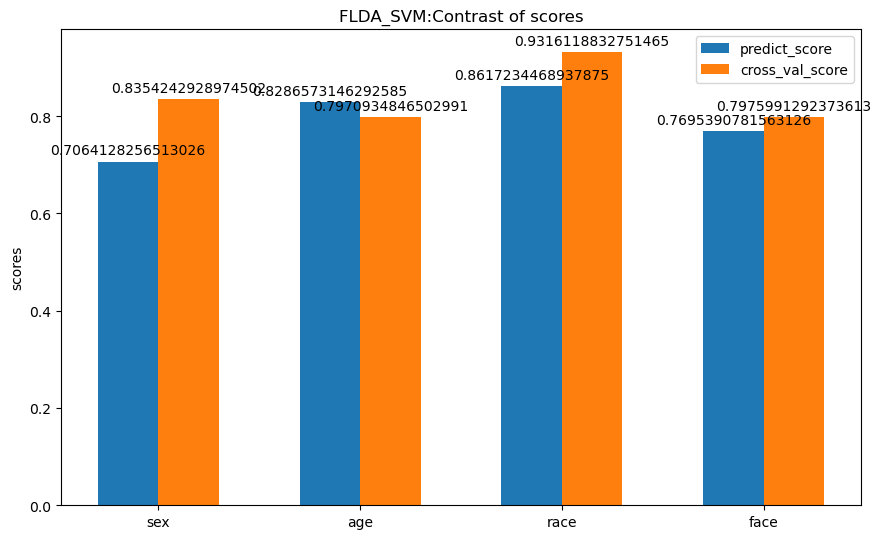

In [17]:
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['figure.figsize'] = (9.0, 5.5)
fig,ax = plt.subplots()
#绘制Bar
labels = ['sex',"age",'race','face']
num = np.arange(4)
result1 = np.array([svm_sex.score(xtest_sex,ytest_sex),svm_age.score(xtest_age,ytest_age),svm_race.score(xtest_race,ytest_race),svm_face.score(xtest_face,ytest_face)])
result2 = np.array([sex_result.mean(),age_result.mean(),race_result.mean(),face_result.mean()])
rects1 = ax.bar(num-0.3/2,result1,width = 0.3,label = 'predict_score')
rects2 = ax.bar(num+0.3/2,result2,width=0.3,label = 'cross_val_score')

ax.set_ylabel("scores")
ax.set_title("FLDA_SVM:Contrast of scores")
ax.set_xticks(num)
ax.set_xticklabels(labels)
ax.legend()
#绘制标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha='center',va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig("FLDA_SVM.jpg")
plt.show()

## 三、BP神经网络分类器及其交叉验证

1. 性别分类

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
#标签数据预处理  
le = LabelEncoder()  
ytrain_sex = le.fit_transform(ytrain[:,1]) 
ytest_sex = le.transform(ytest[:,1])

In [21]:
#用GridSearch调参
param_grid = {'hidden_layer_sizes': [(550,),(600,),(650,)],
               'activation': ['logistic','tanh','relu'],
               'solver': ['adam'],
               'learning_rate_init': [0.001, 0.01, 0.1],
             'max_iter': [500]}
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5)

##性别分类
grid_search.fit(xtrain_sex, ytrain_sex)
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'activation': 'logistic', 'hidden_layer_sizes': (600,), 'learning_rate_init': 0.1, 'max_iter': 500, 'solver': 'adam'}
准确率:  0.8242092731829574


由于BP网络分类的结果是会有变化的，故令分类器训练并预测30次，取30次分数的平均值作为最终结果。

In [20]:
sexscore=float(0)
for i in range(30):
    bp_sex = MLPClassifier(hidden_layer_sizes=(600,),activation='logistic',solver='adam',learning_rate_init=0.1,max_iter=500) #创建最优参数的分类器并训练
    bp_sex.fit(xtrain_sex, ytrain_sex)
    #predict_sex = np.array(le.inverse_transform(bp_sex.predict(xtest_sex))) #预测
    #print('BP网络分类——性别分类预测结果：',predict_sex,predict_sex.shape)
    sexscore = sexscore + bp_sex.score(xtest_sex,ytest_sex)
print('BP网络分类——性别分类分数：',bp_sex.score(xtest_sex,ytest_sex))

BP网络分类——性别分类分数： 0.7129258517034068


2. 年龄分类

In [22]:
#标签数据预处理   
ytrain_age = le.fit_transform(ytrain[:,2]) 
ytest_age = le.transform(ytest[:,2])

In [23]:
#用GridSearch调参
param_grid = {'hidden_layer_sizes': [(500,),(550,),(570,)],
               'activation': ['logistic','tanh','relu'],
               'solver': ['adam'],
               'learning_rate_init': [0.001, 0.01, 0.1],
             'max_iter': [500]}
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5)
##年龄分类
grid_search.fit(xtrain_age, ytrain_age)
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


模型最优参数:  {'activation': 'tanh', 'hidden_layer_sizes': (550,), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
准确率:  0.833779448621554


In [23]:
agescore = float(0)
for i in range(30):
    bp_age = MLPClassifier(hidden_layer_sizes=(550,),activation='tanh',solver='adam',learning_rate_init=0.01,max_iter=500) #创建最优参数的分类器并训练
    bp_age.fit(xtrain_age, ytrain_age)
    #predict_age = np.array(le.inverse_transform(bp_age.predict(xtest_age))) #预测
    #print('BP网络分类——年龄分类预测结果：',predict_age,predict_age.shape)
    agescore = agescore + bp_age.score(xtest_age,ytest_age)
print('BP网络分类——年龄分类分数：',agescore/30)

BP网络分类——年龄分类分数： 0.8151636606546426


3. 种族分类

In [24]:
#标签数据预处理    
ytrain_race = le.fit_transform(ytrain[:,3]) 
ytest_race = le.transform(ytest[:,3])

In [25]:
#用GridSearch调参
param_grid = {'hidden_layer_sizes': [(550,),(600,),(650,)],
               'activation': ['logistic','tanh','relu'],
               'solver': ['adam'],
               'learning_rate_init': [0.001, 0.01, 0.1],
             'max_iter': [500]}
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5)
##种族分类
grid_search.fit(xtrain_race, ytrain_race)
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

模型最优参数:  {'activation': 'tanh', 'hidden_layer_sizes': (600,), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
准确率:  0.957421052631579


In [25]:
racescore = float(0)
for i in range(30):
    bp_race = MLPClassifier(hidden_layer_sizes=(600,),activation='tanh',solver='adam',learning_rate_init=0.01,max_iter=500) #创建最优参数的分类器并训练
    bp_race.fit(xtrain_race, ytrain_race)
    #predict_race = np.array(le.inverse_transform(bp_race.predict(xtest_race))) #预测
    #print('BP网络分类——种族分类预测结果：',predict_race,predict_race.shape)
    racescore = racescore + bp_race.score(xtest_race,ytest_race)
print('BP网络分类——种族分类分数：',racescore/30)

BP网络分类——种族分类分数： 0.8513694054776216


4. 表情分类

In [26]:
#标签数据预处理   
ytrain_face = le.fit_transform(ytrain[:,4]) 
ytest_face = le.transform(ytest[:,4])

In [31]:
#用GridSearch调参
param_grid = {'hidden_layer_sizes': [(560,),(570,),(580,)],
               'activation': ['logistic','tanh','relu'],
               'solver': ['adam'],
               'learning_rate_init': [0.001, 0.01, 0.1],
             'max_iter': [500]}
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5)
##表情分类
grid_search.fit(xtrain_face, ytrain_face)
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'activation': 'logistic', 'hidden_layer_sizes': (570,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
准确率:  0.7985839598997494


In [27]:
facescore = float(0)
for i in range(30):
    bp_face = MLPClassifier(hidden_layer_sizes=(570,),activation='logistic',solver='adam',learning_rate_init=0.001,max_iter=500) #创建最优参数的分类器并训练
    bp_face.fit(xtrain_face, ytrain_face)
    #predict_face = np.array(le.inverse_transform(bp_face.predict(xtest_face))) #预测
    #print('BP网络分类——表情分类预测结果：',predict_face,predict_face.shape)
    facescore = facescore + bp_face.score(xtest_face,ytest_face)
print('BP网络分类——表情分类分数：',facescore/30)

BP网络分类——表情分类分数： 0.7538577154308617


5. 五折交叉验证

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#合并x数据和y数据
X = np.concatenate([xtrain,xtest],axis=0)
Y = np.concatenate([ytrain,ytest],axis=0)
#print('所有图像数据：\n',X,X.shape,'\n所有标签数据：\n',Y,Y.shape)
#交叉验证
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

Y_sex = le.fit_transform(Y[:,1])
sex_result = cross_val_score(bp_sex,X,Y_sex,cv=kfold)
print('性别BP分类交叉验证结果：%0.2f(±%0.2f)'%(sex_result.mean(),sex_result.std()*2))

Y_age = le.fit_transform(Y[:,2])
age_result = cross_val_score(bp_age,X,Y_age,cv=kfold)
print('年龄BP分类交叉验证结果：%0.2f(±%0.2f)'%(age_result.mean(),age_result.std()*2))

Y_race = le.fit_transform(Y[:,3])
race_result = cross_val_score(bp_race,X,Y_race,cv=kfold)
print('种族BP分类交叉验证结果：%0.2f(±%0.2f)'%(race_result.mean(),race_result.std()*2))

Y_face = le.fit_transform(Y[:,4])
face_result = cross_val_score(bp_face,X,Y_face,cv=kfold)
print('表情BP分类交叉验证结果：%0.2f(±%0.2f)'%(face_result.mean(),face_result.std()*2))

性别BP分类交叉验证结果：0.81(±0.04)
年龄BP分类交叉验证结果：0.87(±0.03)
种族BP分类交叉验证结果：0.96(±0.01)
表情BP分类交叉验证结果：0.77(±0.03)


6. 绘制分数对比图

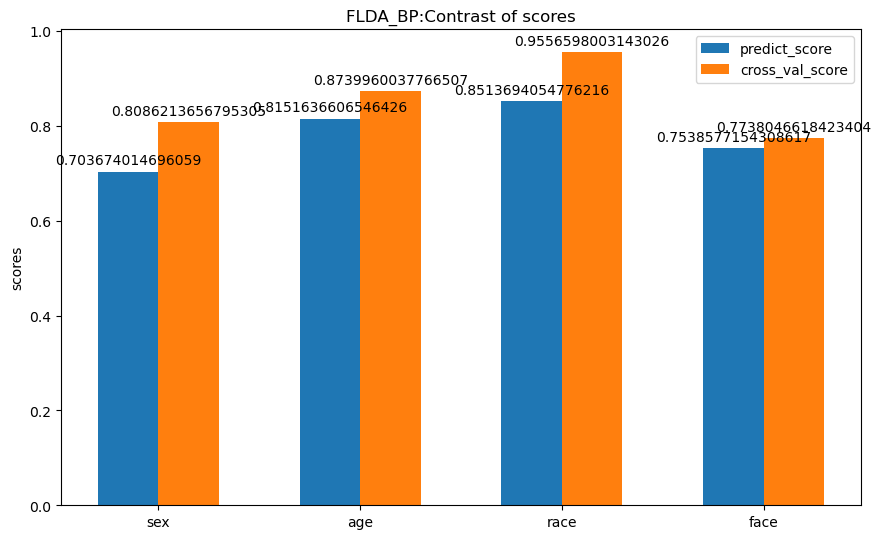

In [29]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['figure.figsize'] = (9.0, 5.5)
fig,ax = plt.subplots()
#绘制Bar
labels = ['sex',"age",'race','face']
num = np.arange(4)
result1 = np.array([sexscore/30,agescore/30,racescore/30,facescore/30])
result2 = np.array([sex_result.mean(),age_result.mean(),race_result.mean(),face_result.mean()])
rects1 = ax.bar(num-0.3/2,result1,width = 0.3,label = 'predict_score')
rects2 = ax.bar(num+0.3/2,result2,width=0.3,label = 'cross_val_score')

ax.set_ylabel("scores")
ax.set_title("FLDA_BP:Contrast of scores")
ax.set_xticks(num)
ax.set_xticklabels(labels)
ax.legend()
#绘制标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha='center',va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig("FLDA_BP.jpg")
plt.show()

## 四、决策树分类器及其交叉验证

1. 性别分类

In [45]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
   'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#用GridSearch调参
param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

##性别分类
grid_search.fit(xtrain_sex, ytrain[:,1])
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
准确率:  0.8172105263157896


In [50]:
dt_sex = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=2,min_samples_split=2)
dt_sex.fit(xtrain_sex,ytrain[:,1])
predict_sex = dt_sex.predict(xtest_sex) #预测
print('决策树分类——性别分类预测结果：',predict_sex,predict_sex.shape)
print('决策树分类——性别分类分数：',dt_sex.score(xtest_sex,ytest[:,1]))

决策树分类——性别分类预测结果： ['male' 'female' 'male' ... 'female' 'male' 'female'] (1996,)
决策树分类——性别分类分数： 0.7009018036072144


2. 年龄分类

In [16]:
param_grid = {
   'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#用GridSearch调参
param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

##年龄分类
grid_search.fit(xtrain_age, ytrain[:,2])
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
准确率:  0.8352644110275689


In [30]:
dt_age = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=1,min_samples_split=2)
dt_age.fit(xtrain_age, ytrain[:,2])
predict_age = dt_age.predict(xtest_age) #预测
print('决策树分类——年龄分类预测结果：',predict_age,predict_age.shape)
print('决策树分类——年龄分类分数：',dt_age.score(xtest_age,ytest[:,2]))

决策树分类——年龄分类预测结果： ['adult' 'adult' 'adult' ... 'adult' 'adult' 'adult'] (1996,)
决策树分类——年龄分类分数： 0.7775551102204409


3. 种族分类

In [28]:
param_grid = {
   'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#用GridSearch调参
param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8],
    'min_samples_split': [6, 7, 8],
    'min_samples_leaf': [1, 2, 3]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

##种族分类
grid_search.fit(xtrain_race, ytrain[:,3])
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 7}
准确率:  0.9504035087719298


In [32]:
dt_race = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=1,min_samples_split=7)
dt_race.fit(xtrain_race, ytrain[:,3])
predict_race = dt_race.predict(xtest_race) #预测
print('决策树分类——种族分类预测结果：',predict_race,predict_race.shape)
print('决策树分类——种族分类分数：',dt_race.score(xtest_race,ytest[:,3]))

决策树分类——种族分类预测结果： ['white' 'white' 'white' ... 'white' 'white' 'white'] (1996,)
决策树分类——种族分类分数： 0.8557114228456913


4. 表情分类

In [37]:
param_grid = {
   'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#用GridSearch调参
param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

##表情分类
grid_search.fit(xtrain_face, ytrain[:,4])
print("模型最优参数: ", grid_search.best_params_)
print("准确率: ", grid_search.best_score_)

模型最优参数:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
准确率:  0.7970814536340851


In [46]:
dt_face = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=2,min_samples_split=2)
dt_face.fit(xtrain_face, ytrain[:,4])
predict_face = dt_face.predict(xtest_face) #预测
print('决策树分类——表情分类预测结果：',predict_face,predict_face.shape)
print('决策树分类——表情分类分数：',dt_face.score(xtest_face,ytest[:,4]))

决策树分类——表情分类预测结果： ['smiling' 'smiling' 'smiling' ... 'serious' 'smiling' 'serious'] (1996,)
决策树分类——表情分类分数： 0.7630260521042084


5. 五折交叉验证

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#合并x数据和y数据
X = np.concatenate([xtrain,xtest],axis=0)
Y = np.concatenate([ytrain,ytest],axis=0)
#print('所有图像数据：\n',X,X.shape,'\n所有标签数据：\n',Y,Y.shape)
#交叉验证
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

sex_result = cross_val_score(dt_sex,X,Y[:,1],cv=kfold)
print('性别决策树分类交叉验证结果：%0.2f(±%0.2f)'%(sex_result.mean(),sex_result.std()*2))

age_result = cross_val_score(dt_age,X,Y[:,2],cv=kfold)
print('年龄决策树分类交叉验证结果：%0.2f(±%0.2f)'%(age_result.mean(),age_result.std()*2))

race_result = cross_val_score(dt_race,X,Y[:,3],cv=kfold)
print('种族决策树分类交叉验证结果：%0.2f(±%0.2f)'%(race_result.mean(),race_result.std()*2))

face_result = cross_val_score(dt_face,X,Y[:,4],cv=kfold)
print('表情决策树分类交叉验证结果：%0.2f(±%0.2f)'%(face_result.mean(),face_result.std()*2))

性别决策树分类交叉验证结果：0.67(±0.02)
年龄决策树分类交叉验证结果：0.79(±0.02)
种族决策树分类交叉验证结果：0.91(±0.02)
表情决策树分类交叉验证结果：0.64(±0.04)


6. 绘制分数对比图

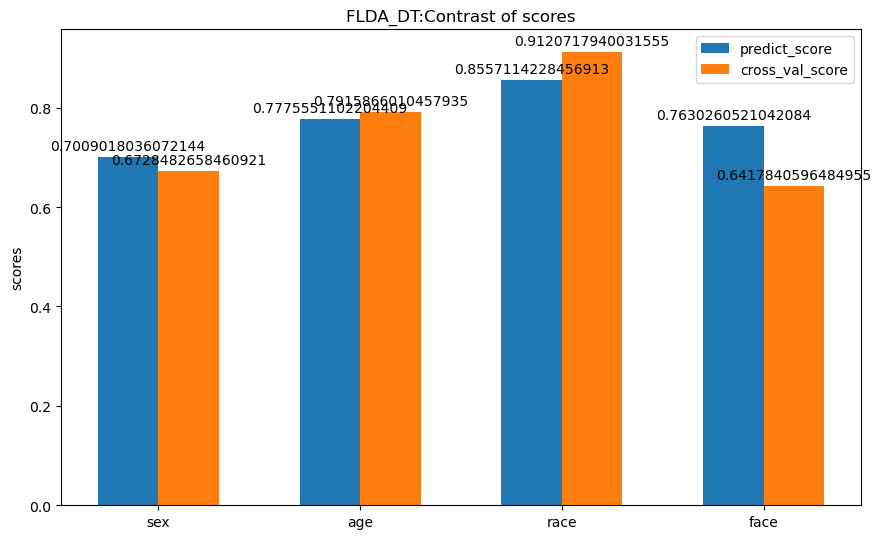

In [51]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['figure.figsize'] = (9.0, 5.5)
fig,ax = plt.subplots()
#绘制Bar
labels = ['sex',"age",'race','face']
num = np.arange(4)
result1 = np.array([dt_sex.score(xtest_sex,ytest[:,1]),dt_age.score(xtest_age,ytest[:,2]),
                    dt_race.score(xtest_race,ytest[:,3]),dt_face.score(xtest_face,ytest[:,4])])
result2 = np.array([sex_result.mean(),age_result.mean(),race_result.mean(),face_result.mean()])
rects1 = ax.bar(num-0.3/2,result1,width = 0.3,label = 'predict_score')
rects2 = ax.bar(num+0.3/2,result2,width=0.3,label = 'cross_val_score')

ax.set_ylabel("scores")
ax.set_title("FLDA_DT:Contrast of scores")
ax.set_xticks(num)
ax.set_xticklabels(labels)
ax.legend()
#绘制标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha='center',va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig("FLDA_DT.jpg")
plt.show()